In [3]:
import pickle

In [4]:
import numpy as np
import pandas as pd

In [5]:
n_folds = 5

In [6]:
models = [
    {
        'name': 'flaubert/flaubert_small_cased',
        'label': 'flau_small_c',
        'to_print': 'FlauBERT'

    },
    {
    
        'name': 'flaubert/flaubert_base_uncased', 
        'label': 'flau_base_u'

    },
    {
        'name': 'flaubert/flaubert_base_cased',
        'label': 'flau_base_c'
    },
    {
        'name': 'flaubert/flaubert_large_cased',
        'label': 'flau_large_c'
    },
    {
        'name': 'camembert/camembert-base',
        'label': 'cam_base'
    },
    {
        'name': 'xlm-roberta-large',
        'label': 'xlm_large'
    },
    {
    
        'name': 'xlm-roberta-base', 
        'label': 'xlm_base'

    },
    {
        'name': 'bert-base-multilingual-uncased',
        'label': 'bert_base_u'
    },
    {
        'name': 'distilbert-base-multilingual-cased',
        'label': 'distilbert_base',
        'to_print': 'DistilBERT'
        
    },
    {
        'name': 'bert-base-multilingual-cased',
        'label': 'bert_base_c'
    }
    
]

In [7]:
labels = [x['label'] for x in models]

In [8]:
tasks = [
    'gender_noun',
    'gender_adj',
    'gender_na',
    'number_noun',
    'number_adj',
    'number_na',
    'pos_noun',
    'pos_adj',
    'pos_verb',
    'semantic_person',
    'semantic_act'
]

In [9]:
def get_stable_dims(label, task):
    with open(f'../Data/best_results/{task}_dims.pickle', 'rb') as f:
        dims = pickle.load(f)

    with open(f'../Data/best_results/{task}_accs.pickle', 'rb') as f:
        accs = pickle.load(f)

    with open(f'../Data/best_results/{task}_medians.pickle', 'rb') as f:
        medians = pickle.load(f)
    
    all_best_dims = []
    for i in range(n_folds):
        test = {k: v[i] for k, v in accs[label].items()}
        all_best_dims.extend(dims[label][max(test, key=test.get)][i])
        
    d, c = np.unique(all_best_dims, return_counts=True)
    
    stable_dims = [x[0] for x in zip(d,c) if x[1] == n_folds]
    
    return stable_dims

In this notebook we can explore intersections of stable dimensions found for multiple tasks.

First, we can start by finding the number of stable dimensions found for each task and for each model:

In [10]:
stable_df = pd.DataFrame(index=labels, columns=tasks)

In [12]:
for l in labels:
    for t in tasks:
        stable_df.loc[l, t] = len(get_stable_dims(l, t))

In [13]:
stable_df

,gender_noun,gender_adj,gender_na,number_noun,number_adj,number_na,pos_noun,pos_adj,pos_verb,semantic_person,semantic_act
flau_small_c,100,175,74,213,107,127,92,77,24,95,48
flau_base_u,40,26,47,120,4,91,20,5,49,5,2
flau_base_c,123,22,68,22,4,7,18,5,22,1,14
flau_large_c,203,134,227,107,151,195,101,58,73,63,50
cam_base,0,1,0,0,0,9,1,0,0,0,1
xlm_large,0,0,1,0,0,1,0,1,1,0,0
xlm_base,0,0,0,2,1,0,1,1,1,1,1
bert_base_u,0,0,3,0,0,4,1,0,0,0,0
distilbert_base,4,18,14,22,0,15,3,0,5,1,3
bert_base_c,0,5,0,0,0,0,1,0,0,6,0


We can see that for CamemBERT, XLM, and mBERT there are no stable dimensions found, therefore, we won't consider them in the scope of the notebook.

In [18]:
stable_df = stable_df.loc[['flau_small_c',
                      'flau_base_u',
                      'flau_base_c',
                      'flau_large_c',
                     'distilbert_base']]

# FlauBERT small

Find number of stable dimensions found for number of nouns, gender of nouns, PoS of nouns, and their intersection.

In [19]:
task_idx = [0, 3, 6]

In [20]:
dims = []

for i in task_idx:
    d = get_stable_dims(labels[0], tasks[i])
    dims.append(d)

In [24]:
# !pip install matplotlib_venn

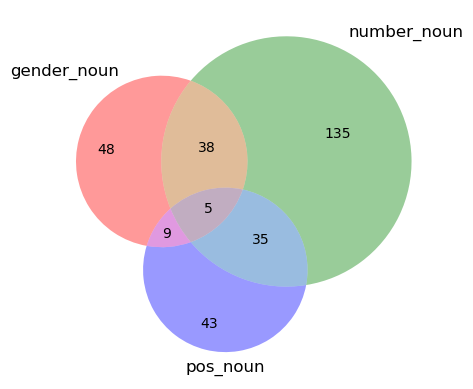

In [28]:
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()


Here are 5 dimensions that appeared for all number, gender, and PoS of nouns in FlauBERT small:

In [30]:
set(dims[2]).intersection(dims[1]).intersection(dims[0])

{117, 130, 192, 198, 455}

________________
We can repeat the same comparison but for adjectives:

In [31]:
task_idx = [1, 4, 7]

In [32]:
dims = []

for i in task_idx:
    d = get_stable_dims(labels[0], tasks[i])
    dims.append(d)

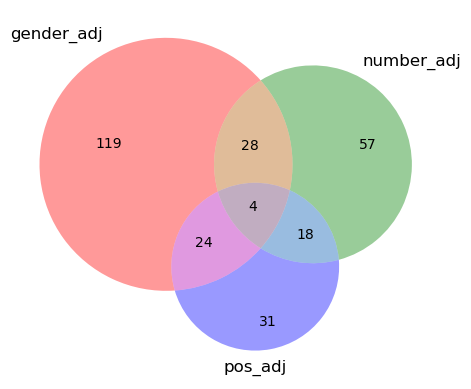

In [33]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()

In [34]:
set(dims[2]).intersection(dims[1]).intersection(dims[0])

{56, 250, 310, 461}

We can notice no overlap with 5 dimensions found for nouns above.

_________________
What if we compare stable dimensions found for noun-ness, adjective-ness and verb-ness?

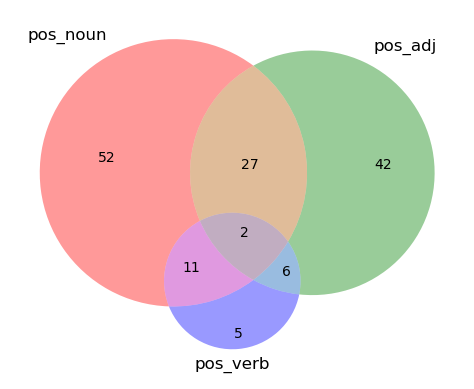

In [35]:
task_idx = [6, 7, 8]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[0], tasks[i])
    dims.append(d)
 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()

There are 2 dimensions that correspond to PoS for all nouns, adjectives and verbs:

In [36]:
set(dims[2]).intersection(dims[1]).intersection(dims[0])

{159, 462}

____________
What about semantic information? Is there a dimension that corresponds to noun PoS, Act and Person?

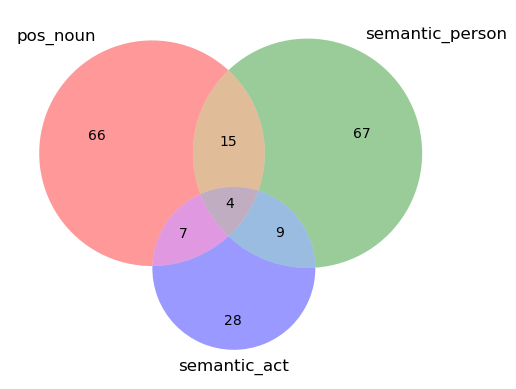

In [37]:
task_idx = [6, 9, 10]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[0], tasks[i])
    dims.append(d)

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()

We can see that 4 dimensions corresponding to noun-ness are also connected to Act and Person information:

In [38]:
set(dims[2]).intersection(dims[1]).intersection(dims[0])

{33, 41, 339, 423}

# FlauBERT base

Let's see if we can see the same results for other models, for example, FlauBERT base cased.

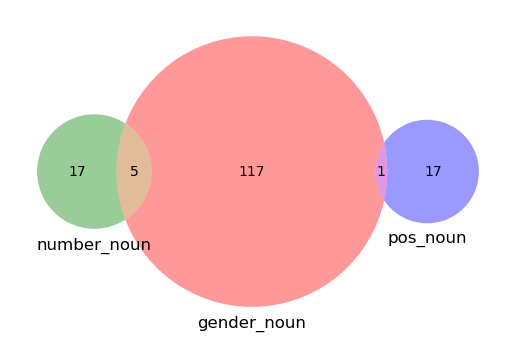

In [39]:
task_idx = [0, 3, 6]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[2], tasks[i])
    dims.append(d)

# !pip install matplotlib_venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()


We can see that for FlauBERT base cased, there is no stable dimension found for all number, gender, and PoS.

______________________
What about PoS?

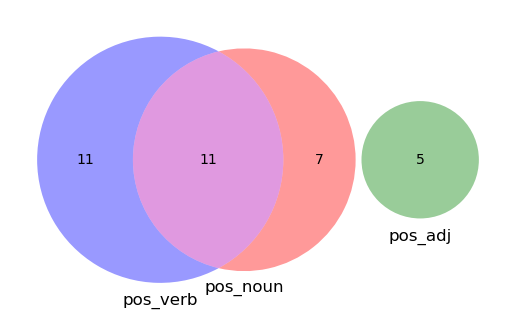

In [40]:
task_idx = [6, 7, 8]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[2], tasks[i])
    dims.append(d)

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()

Similarly, no dimension shared for all PoS.

_____________
What about semantic information?

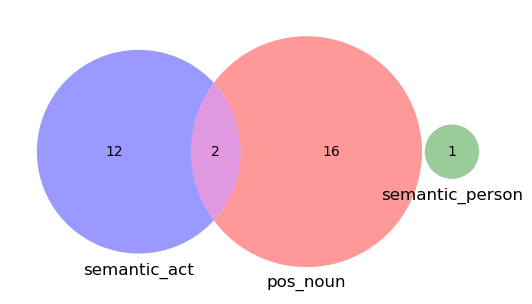

In [41]:
task_idx = [6, 9, 10]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[2], tasks[i])
    dims.append(d)

 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()

Similarly, no stable dimension that shares all information.

# FlauBERT large

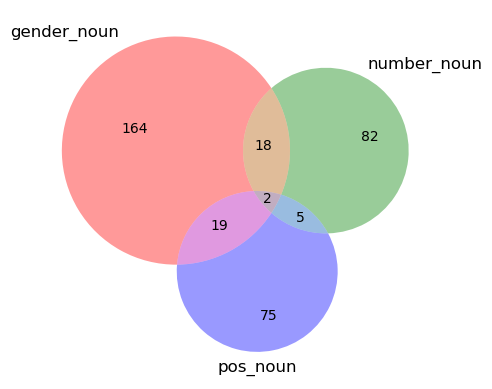

In [42]:
task_idx = [0, 3, 6]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[3], tasks[i])
    dims.append(d)

# !pip install matplotlib_venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()


For FlauBERT large 2 dimension were found that share all gender, number and PoS information for nouns:

In [43]:
set(dims[2]).intersection(dims[1]).intersection(dims[0])

{171, 680}

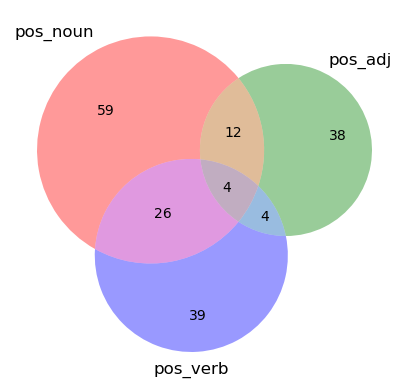

In [45]:
task_idx = [6, 7, 8]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[3], tasks[i])
    dims.append(d)

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()

For FlauBERT large 4 stable dimensions were found for PoS of nouns, adjectives, and verbs:

In [46]:
set(dims[2]).intersection(dims[1]).intersection(dims[0])

{88, 207, 437, 689}

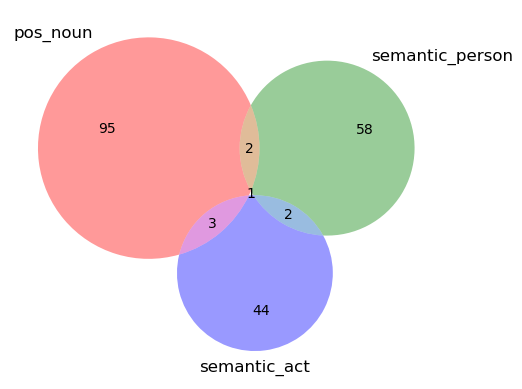

In [47]:
task_idx = [6, 9, 10]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[3], tasks[i])
    dims.append(d)

 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()

1 stable dimension was found for FlauBERT large for all pos, Act and Person information:

In [48]:
set(dims[2]).intersection(dims[1]).intersection(dims[0])

{88}

We can note that dimension 88 was found for PoS information for FlauBERT large.

# DistilBERT

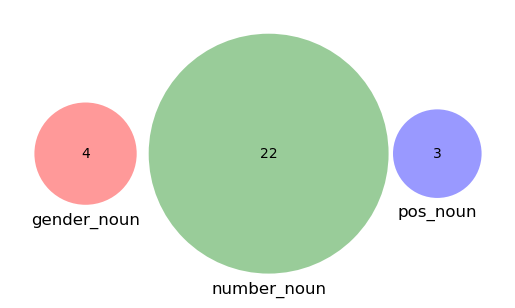

In [50]:
task_idx = [0, 3, 6]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[-2], tasks[i])
    dims.append(d)

# !pip install matplotlib_venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()


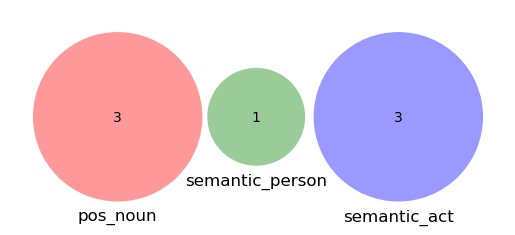

In [55]:
task_idx = [6, 9, 10]

dims = []

for i in task_idx:
    d = get_stable_dims(labels[-2], tasks[i])
    dims.append(d)

 
# Make the diagram
venn3(subsets = (len(set(dims[0]).difference(dims[1]).difference(dims[2])),
                 len(set(dims[1]).difference(dims[0]).difference(dims[2])),
                len(set(dims[0]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).difference(dims[0]).difference(dims[1])),
                len(set(dims[2]).intersection(dims[0])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1])) - len(set(dims[2]).intersection(dims[1]).intersection(dims[0])),
                len(set(dims[2]).intersection(dims[1]).intersection(dims[0]))

), set_labels = (tasks[i] for i in task_idx))
plt.show()

For DistilBERT no intersection at all was found.